La Ecuación de Reacción-Difusión en una dimensión está dada por la ecuación diferencial parcial

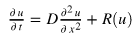 

donde $D$ es el coeficiente de difusión y $R(u)$ es una función de reacción. La forma de la función $R(u)$, puede describir una colección amplia de fenómenos físicos.

Comúnmente la ecuación de reacción difusión se utiliza para estudiar la evolución temporal de una mezcla de componentes químicos que reaccionan entre si, por ejemplo

image.png

donde se mezclan 2 moleculas de Hidrógeno y una oxígeno, para formar agua, con ayuda de un catalizador que facilite la reacción.

Se pide trabajar el caso donde $R(u) = \alpha u$, siendo $\alpha$ el coeficiente de reacción.

Entonces nos interesa resolver la ecuación

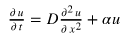

Aquí $u$ denotaría la concentración del compuesto químico. Si $\alpha=0$, la ecuación anterior se reduce a una simple ecuación de difusión como la que vimos en la ecuación del calor.

Supondremos que $D=1$ y $\alpha=-1$.

Resuelve numéricamente la ecuación de reacción-difusión en una dimensión, para estudiar la evolución de un modelo simple de reacción-difusión de mezclar moleculas de $2 H_2$ con $O_2$ en un tubo unidimensional de longitud $L=1$ en la dirección $x$, y que inicialmente se encuentra vacío $u(x,0)=0$ como se muestra en la siguiente figura

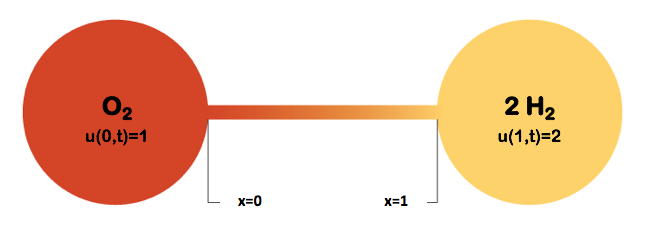

Se pide adaptar el código desarrolado en el sitio del curso de Numerical Methods using Python del Dr. Vivi Andasari de la Universidad de Boston.

En la sesión 15, se describen los algoritmos por si desean consultar los detalles. Se resuelve la ecuación de Reacción-Difusión en una dimensión, usando métodos de diferencia finita (Backward Time Centered Space - BTCS). Se provee el código para problemas de condiciones a la frontera tipo Dirichlet y también para el tipo Neumann.

Por favor descarga ambos códigos para cada caso, dado que se utilizarán en los siguientes 2 problemas.

Problema 1:

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


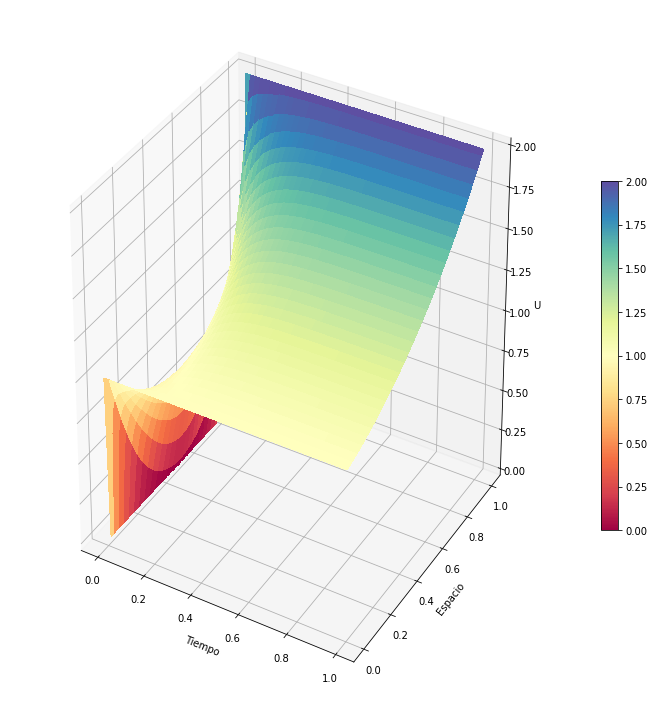

In [47]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

#puntos en el intervalo para experimentar con la cantidad a elegir
M=60
N=180

#posiciones
x0=0 #inicial
xL=1 #final

dx=(xL-x0)/(M-1)

t0=0
tf=1

dt=(tf-t0)/(N-1)
#Coeficiente de difusión
D=1
#reaction rate
alpha=-1

r=dt*D/dx**2
s=dt*alpha

xspan=np.linspace(x0,xL, M)
tspan=np.linspace(t0,tf, N)

main_diag=(1+2*r-s)*np.ones((1,M-2))
off_diag=-r*np.ones((1, M-3))

a= main_diag.shape[1]

diagonals=[main_diag, off_diag, off_diag]

A=sparse.diags(diagonals, [0,-1,1],shape=(a,a)).toarray()

U=np.zeros((M, N))

U[:,0]=0
#Condiciones en la frontera u(0,t)=1
U[0,:]=1.0
#Condición en la frontera L=2
U[-1,:]=2.0

for k in range(1,N):
    c=np.zeros((M-4,1)).ravel()
    b1=np.asarray([r*U[0,k], r*U[-1,k]])
    b1=np.insert(b1,1,c)
    b2=np.array(U[1:M-1, k-1])
    #lado derecho
    b=b1+b2
    U[1:M-1, k]=np.linalg.solve(A,b)

g=np.allclose(np.dot(A,U[1:M-1, N-1]), b) 
print(g)

X, T=np.meshgrid(tspan,xspan)

fig=plt.figure(figsize=(10,10))
ax=fig.gca(projection='3d')

surf=ax.plot_surface(X, T, U, linewidth=0,
                     cmap=cm.Spectral, antialiased=False)

m=cm.ScalarMappable(cmap=cm.Spectral)
m.set_array(U)
plt.colorbar(m, shrink=0.5)

ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

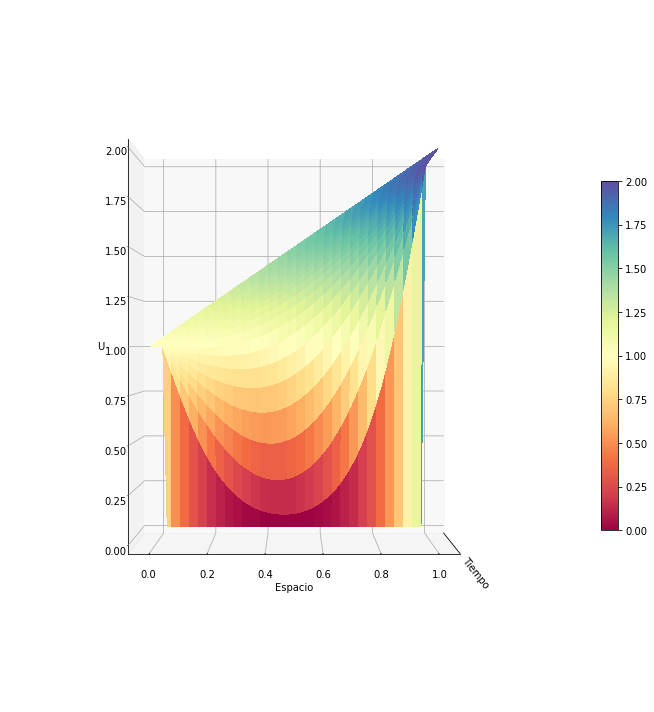

In [56]:
#Cambaindo la perspectiva o visión de la gráfica para obtener  más información de análisis
fig=plt.figure(figsize=(10,10))
ax=fig.gca(projection='3d')

surf=ax.plot_surface(X, T, U, linewidth=0,
                     cmap=cm.Spectral, antialiased=False)
ax.set_xticks([])

m=cm.ScalarMappable(cmap=cm.Spectral)
m.set_array(U)
plt.colorbar(m, shrink=0.5)

ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U')
ax.view_init(elev=0, azim=0)
plt.tight_layout()
plt.show()


Vemos que la concentración tiene como condición inicial al cero en el tiempo cero, en el espacio 0 es 1. La concentración va creciendo hasta llegar al 2. Si el espacio es mayor, la concentración tambien lo será.

Problema 2:

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$ y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

True


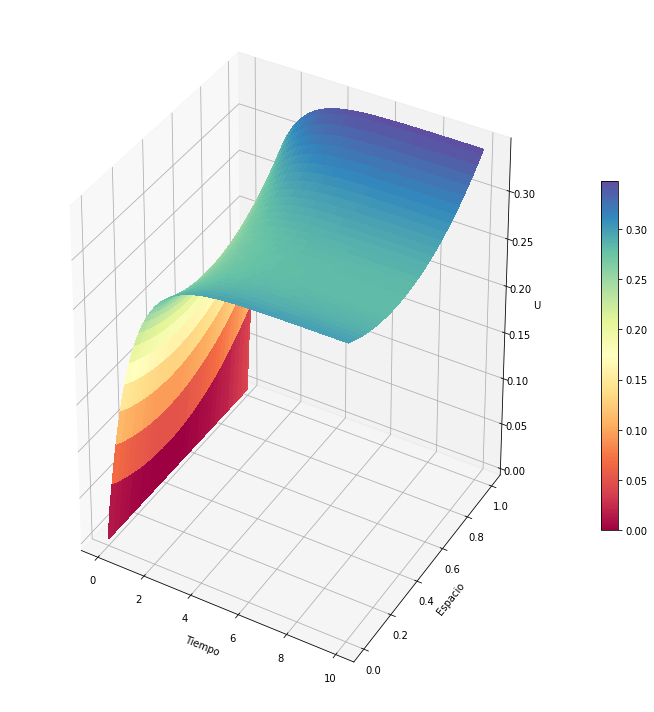

In [59]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

#puntos en el intervalo
M=60
N=180

#posiciones
x0=0 #inicial
xL=1 #final

dx=(xL-x0)/(M-1)

t0=0
tf=10

dt=(tf-t0)/(N-1)
#Coeficiente de difusión
D=1
#reaction rate
alpha=-1

r=dt*D/dx**2
s=dt*alpha
a=1+2*r

xspan=np.linspace(x0,xL, M)
tspan=np.linspace(t0,tf, N)

main_diag=(1+2*r-s)*np.ones((1,M))
off_diag=-r*np.ones((1, M-1))

a= main_diag.shape[1]

diagonals=[main_diag, off_diag, off_diag]

A=sparse.diags(diagonals, [0,-1,1],shape=(a,a)).toarray()
A[0,1]=-2*r
A[M-1,M-2]=-2*r

U=np.zeros((M, N))

U[:,0]=0

#(0,t)=0.1
f =0.1*np.ones([N+1, 1])
#(1,t)=0.2
g=0.2*np.ones([N+1, 1])

for k in range(1,N):
    c=np.zeros((M-2,1)).ravel()
    b1=np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1=np.insert(b1,1,c)
    b2=np.array(U[0:M, k-1])
    #lado derecho
    b=b1+b2
    U[0:M, k]=np.linalg.solve(A,b)

gc=np.allclose(np.dot(A,U[0:M, N-1]), b) 
print(gc)

X, T=np.meshgrid(tspan,xspan)

fig=plt.figure(figsize=(10,10))
ax=fig.gca(projection='3d')

surf=ax.plot_surface(X, T, U, linewidth=0,
                     cmap=cm.Spectral, antialiased=False)

m=cm.ScalarMappable(cmap=cm.Spectral)
m.set_array(U)
plt.colorbar(m, shrink=0.5)

ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

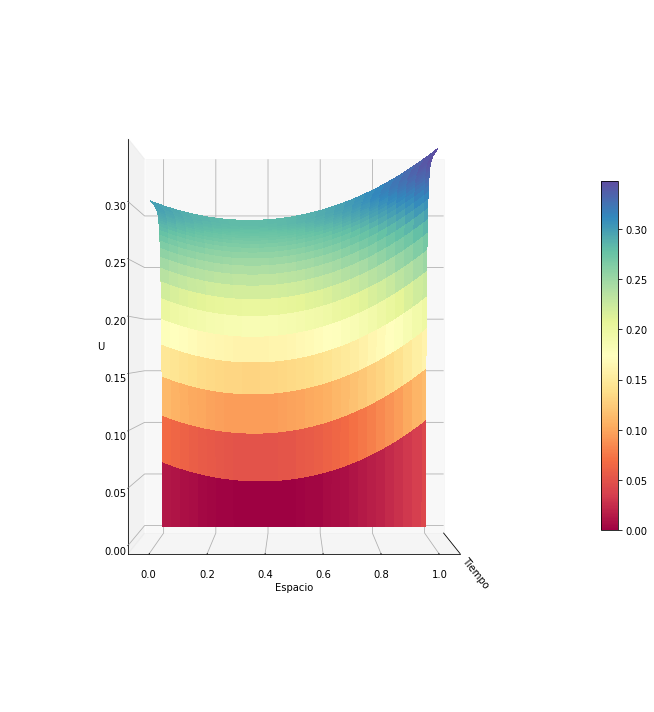

In [60]:
#Cambaindo la perspectiva o visión de la gráfica para obtener  más información de análisis
fig=plt.figure(figsize=(10,10))
ax=fig.gca(projection='3d')

surf=ax.plot_surface(X, T, U, linewidth=0,
                     cmap=cm.Spectral, antialiased=False)
ax.set_xticks([])

m=cm.ScalarMappable(cmap=cm.Spectral)
m.set_array(U)
plt.colorbar(m, shrink=0.5)

ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U')
ax.view_init(elev=0, azim=0)
plt.tight_layout()
plt.show()

En este problema se puede ver en la nueva perspectiva de gráfica que la variación es menor que en el pasado, no hay un cambio tan drástico de un numero entero a otro, la escala es más pequeña, más concentrada en un intervalo mpas chico. La curva va de 0.30 hasta 0.35 por lo que se puede suponer, ya que tampoco es exacto en dicha gráfica.

Problema 3:

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso.

True


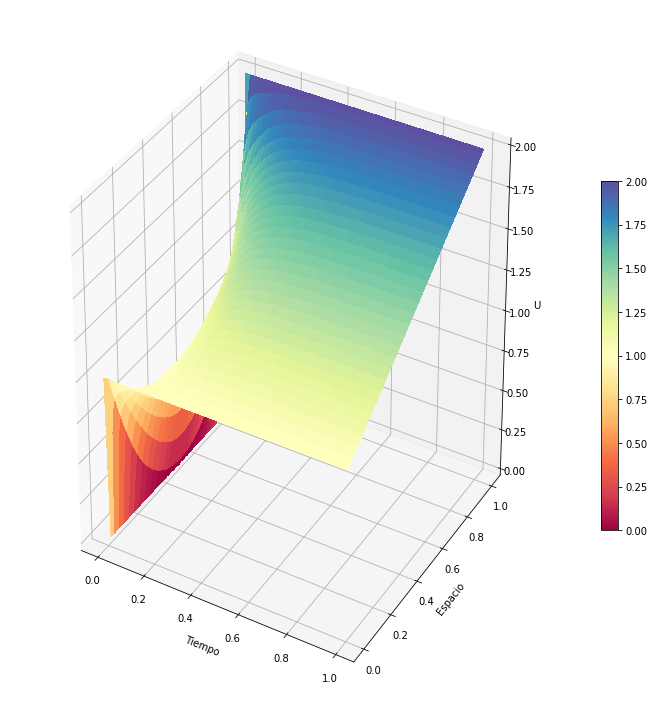

In [62]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

#puntos en el intervalo
M=60
N=180

#posiciones
x0=0 #inicial
xL=1 #final

dx=(xL-x0)/(M-1)

t0=0
tf=1

dt=(tf-t0)/(N-1)
#Coeficiente de difusión
D=1
#reaction rate
alpha=0

r=dt*D/dx**2
s=dt*alpha

xspan=np.linspace(x0,xL, M)
tspan=np.linspace(t0,tf, N)

main_diag=(1+2*r-s)*np.ones((1,M-2))
off_diag=-r*np.ones((1, M-3))

a= main_diag.shape[1]

diagonals=[main_diag, off_diag, off_diag]

A=sparse.diags(diagonals, [0,-1,1],shape=(a,a)).toarray()

U=np.zeros((M, N))

U[:,0]=0
#Condiciones en la frontera u(0,t)=1
U[0,:]=1.0
U[-1,:]=2.0

for k in range(1,N):
    c=np.zeros((M-4,1)).ravel()
    b1=np.asarray([r*U[0,k], r*U[-1,k]])
    b1=np.insert(b1,1,c)
    b2=np.array(U[1:M-1, k-1])
    #lado derecho
    b=b1+b2
    U[1:M-1, k]=np.linalg.solve(A,b)

g=np.allclose(np.dot(A,U[1:M-1, N-1]), b) 
print(g)

X, T=np.meshgrid(tspan,xspan)

fig=plt.figure(figsize=(10,10))
ax=fig.gca(projection='3d')

surf=ax.plot_surface(X, T, U, linewidth=0,
                     cmap=cm.Spectral, antialiased=False)

m=cm.ScalarMappable(cmap=cm.Spectral)
m.set_array(U)
plt.colorbar(m, shrink=0.5)

ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

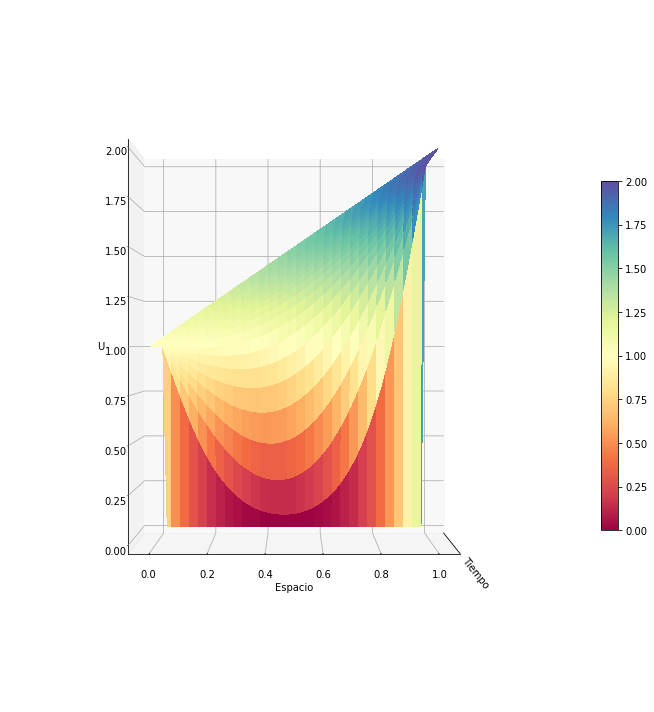

In [63]:
#Cambaindo la perspectiva o visión de la gráfica para obtener  más información de análisis
fig=plt.figure(figsize=(10,10))
ax=fig.gca(projection='3d')

surf=ax.plot_surface(X, T, U, linewidth=0,
                     cmap=cm.Spectral, antialiased=False)
ax.set_xticks([])

m=cm.ScalarMappable(cmap=cm.Spectral)
m.set_array(U)
plt.colorbar(m, shrink=0.5)

ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U')
ax.view_init(elev=0, azim=0)
plt.tight_layout()
plt.show()

Este problema puede parecer de pronto, idéntico al problema 1 pero cambia una cosa, el valor de alpha. Ahora es igual a cero. Esto hace que ahora la concentración del compuesto químico sea mayor, al menos un poco más que en el primer caso.